## Rescues Vs Weather conditions

This piece of data analysis is done for Friends of Snakes Soceity (FOSS), an NGO in Hyderabad, working towards the conservation of snakes. The data is collected by FOSS and its members who are actively involved in rescue operations.

### Loading the data into a dataframe

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

rescue_data = pd.read_csv("../data/ResVWea.csv")

In [61]:
rescue_data

,Year,Month,Rescued,Temperature (Celsius),Humidity (%),Rainfall (in mm)
0,2013,Jan,72,28,45,0.00
1,2013,Feb,100,28,43,0.51
2,2013,Mar,152,32,27,0.00
3,2013,Apr,166,34,34,72.12
4,2013,May,163,37,26,12.44
5,2013,Jun,362,31,60,66.55
6,2013,Jul,221,29,72,68.08
7,2013,Aug,147,28,72,1.78
8,2013,Sep,166,28,66,52.83
9,2013,Oct,291,29,66,19.05


In [62]:
rescue_data['MonthYear'] = rescue_data['Month'] + " " + rescue_data['Year'].map(str)

In [63]:
rescue_data.head()

,Year,Month,Rescued,Temperature (Celsius),Humidity (%),Rainfall (in mm),MonthYear
0,2013,Jan,72,28,45,0.00,Jan 2013
1,2013,Feb,100,28,43,0.51,Feb 2013
2,2013,Mar,152,32,27,0.00,Mar 2013
3,2013,Apr,166,34,34,72.12,Apr 2013
4,2013,May,163,37,26,12.44,May 2013


In [64]:
rescue_data = rescue_data.reindex(columns=['MonthYear', 'Year', 'Month', 'Rescued', 'Temperature (Celsius)', 'Humidity (%)', 'Rainfall (in mm)'])

### Rescues Vs Climate factors

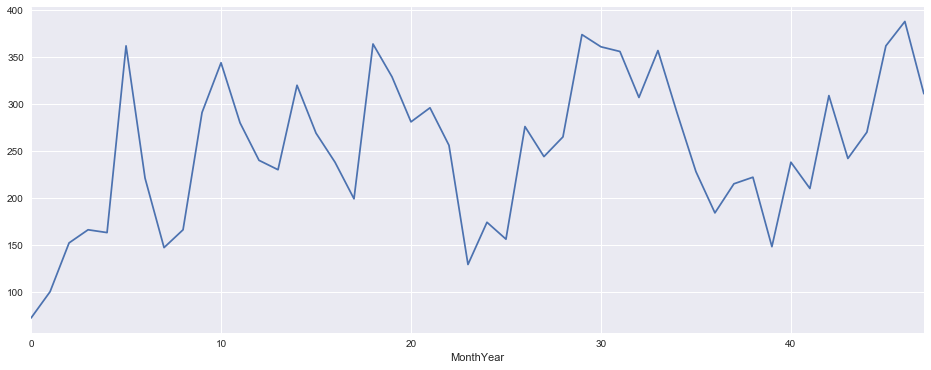

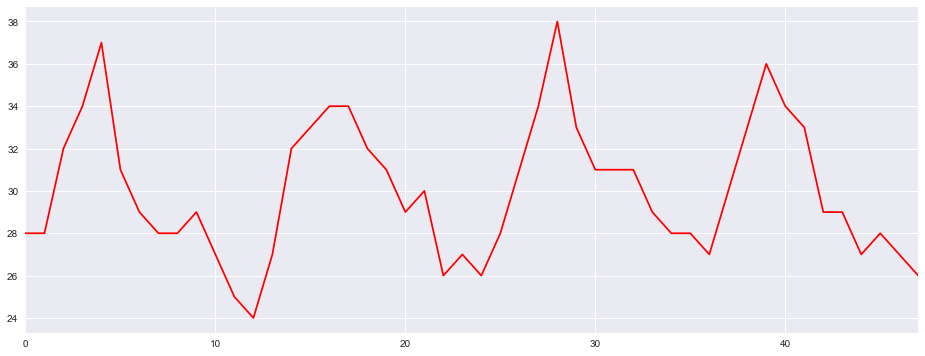

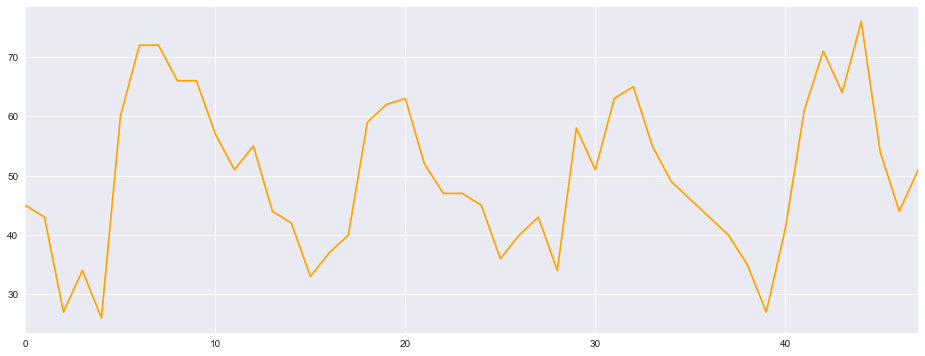

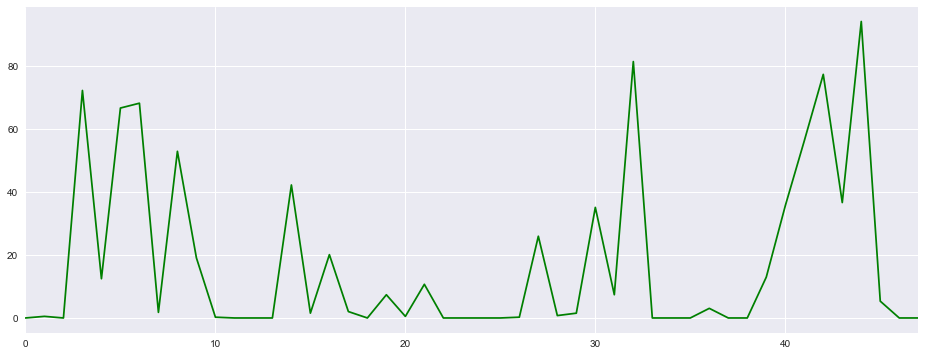

In [82]:
### Time-series plot of rescues to check for seasonality

plt.subplots(figsize=(16, 6))
sns.tsplot(data=rescue_data.set_index('MonthYear')['Rescued'])
plt.xlabel('MonthYear')
plt.show()

plt.subplots(figsize=(16, 6))
sns.tsplot(data=rescue_data.set_index('MonthYear')['Temperature (Celsius)'], color='red')
plt.show()

plt.subplots(figsize=(16, 6))
sns.tsplot(data=rescue_data.set_index('MonthYear')['Humidity (%)'], color='orange')
plt.show()

plt.subplots(figsize=(16, 6))
sns.tsplot(data=rescue_data.set_index('MonthYear')['Rainfall (in mm)'], color='green')
plt.show()

In [66]:
rescue_data.head()

,MonthYear,Year,Month,Rescued,Temperature (Celsius),Humidity (%),Rainfall (in mm)
0,Jan 2013,2013,Jan,72,28,45,0.00
1,Feb 2013,2013,Feb,100,28,43,0.51
2,Mar 2013,2013,Mar,152,32,27,0.00
3,Apr 2013,2013,Apr,166,34,34,72.12
4,May 2013,2013,May,163,37,26,12.44


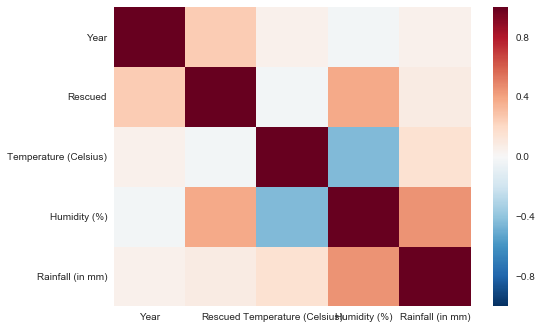

In [67]:
### Checking for multi-colinearity among factors

corr = rescue_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

The colinearity grid above is colored in the strength of correlation factors. Darker reddish shade symbolizes higher positive correlation and darker blue shade symbolized higher negative correlation. The white symbolizes 0 correlation. From above Colinearity grid, we can see that (Rescued) number of rescues has a relatively high positive correlation with Humidity (%). Humidity and Rainfall have a similar high positive correlation and Temperature and Humidity have a relatively strong negative correlation.

In [68]:
## Regression

X = rescue_data[['Temperature (Celsius)','Humidity (%)', 'Rainfall (in mm)']]

Y = rescue_data[['Rescued']]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[ 4.90704752  3.12971026 -0.48619193]]


Coefficients for Temperature, Humidity and Rainfall are 4.9, 3.12 and -0.48. This might mean that number of rescues increases more sharply with a change in temperature, than in a change in humidity. However, the multi-colinearity grid above suggests that number of rescues are more strongly correlated with humidity than with temperature. The above regression model consists of temperature, humidity and rainfall which are correlated among themselves, and so they are not truly independent variables.

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

Y_predictions = lm.predict(X_test)
mean_sqr_err = mean_squared_error(Y_test, Y_predictions)
r2 = r2_score(Y_test, Y_predictions)

print("The coefficients are:",lm.coef_,"and mean squared error is: %.2f" %mean_sqr_err)
print('R2 (R squared) is equal to: %.2f' %r2)

The coefficients are: [[ 4.90704752  3.12971026 -0.48619193]] and mean squared error is: 3483.00
R2 (R squared) is equal to: 0.38


When a regression model is fit into the given data, an Mean Squarred Error (MSE) of 3483 and a R2 of 0.38 are obtained. The high MSE value shows that the curve/line is underfitting the given data. The R2, or coefficient of determination suggests that the factors considered here explain the independent variable up to a certain degree, but not completely (R2 is not equal to 1). There could be various reasons for the low R2 value, including data sparsity.